#### 第2価格秘密入札のシミュレーション
##### 第2価格秘密入札のプロトコル
- 主催者が開始時点での最低の価格を参加者全員に通知する。
- 各参加者は主催者に自身の価格（入札額）を通知する。この価格はほかの参加者には知らされない。
- 最高額の価格を通知した参加者が財を取得し，2番目に高い価格（第2価格）を支払う。

##### シミュレーション上の設定
- 各参加者の真の評価額$v_i$についてIPV設定を採用する。  
  $v_i$は独立に区間 $[v_{\min}, v_{\max}]$ 上の一様分布に従う

- 参加者の申告額（入札額）$\hat{v}_i$は，評価額$v_i$と同様に連続型の変数であり，
  $\hat{v}_i \in [v_{\min}, v_{\max}]$。

- 戦略は，以下のいずれかとする。
  - 第1価格秘密入札におけるナッシュ均衡戦略:  &emsp; $ \hat{v}_i = \dfrac{n-1}{n} v_i $
  - 正直な申告(第1価格秘密入札における支配戦略):  &emsp; $ \hat{v}_i = v_i $
  - 混合戦略: &emsp; 区間 $[v_{\min}, v_i]$ 上の一様分布に従う $\hat{v}_i$ の標本値を申告額とする。

0: mixed strategy (uniform dist. over [vmin, v])
1: truthful strategy
2: truthful strategy
3: truthful strategy
4: truthful strategy
sample exp. util.: [0.1137511  0.46740611 0.44401599 0.46930087 0.43910472]


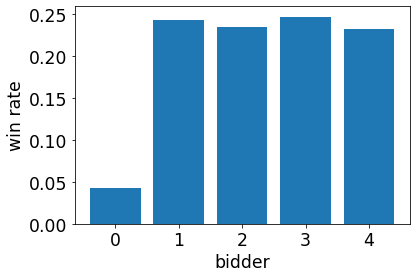

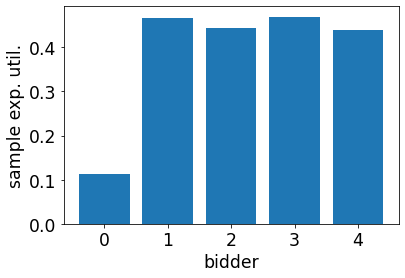

In [2]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

num_bidders = 5 ; num_repeat = 10000 #3 #
vmin, vmax = (0, 10)

v = uniform.rvs(loc=vmin, scale=(vmax - vmin), size=(num_repeat, num_bidders))
# h = np.full_like(v, fill_value=1)

st_nash_eql = lambda v, n: (n-1)*v/n
st_truthful = lambda v, n: v
st_rand_uni = lambda v, n: uniform.rvs(loc=vmin, scale=(v - vmin), size=v.shape)
stg_name = {
    st_nash_eql: 'strategy in Nash Eql. (of 1st-price auction)', 
    st_truthful: 'truthful strategy',
    st_rand_uni: 'mixed strategy (uniform dist. over [vmin, v])'}


if False:
    # 全員が同じ戦略をとる場合

    # strategy_list = [st_nash_eql for dummy in range(num_bidders)]
    strategy_list = [st_truthful for dummy in range(num_bidders)]

else:
    # 一人だけ異なる戦略をとる場合

    # strategy_list = [st_truthful, *tuple(st_nash_eql for _ in range(num_bidders-1))]
    # strategy_list = [st_truthful, *(st_nash_eql for dummy in range(num_bidders-1))]
    # strategy_list = [st_nash_eql, *(st_truthful for dummy in range(num_bidders-1))]
    strategy_list = [st_rand_uni, *(st_truthful for dummy in range(num_bidders-1))]

print('\n'.join(f'{i}: {stg_name[s]}' for i, s in enumerate(strategy_list)))

v_hat = np.vstack([strategy_list[i](v[:, i], num_bidders) for i in range(num_bidders)]).T

sort_axis = 1
idx = np.argsort(v_hat, axis=sort_axis)
idx_winner = np.expand_dims(idx[:,-1], axis=-1)
idx_2nd_price = np.expand_dims(idx[:,-2], axis=-1)
payment = np.take_along_axis(v_hat, idx_2nd_price, axis=sort_axis)
true_value = np.take_along_axis(v, idx_winner, axis=sort_axis)
win_count = np.array([np.count_nonzero(idx_winner == i) for i in range(num_bidders)])
win_rate = win_count/num_repeat
util = np.zeros_like(v_hat)
np.put_along_axis(util, idx_winner, true_value - payment, axis=sort_axis) 
smp_exp_util = np.mean(util, axis=0)
print('sample exp. util.:', smp_exp_util)


plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['ytick.labelsize'] = 'xx-large' #'large'
plt.rcParams['xtick.labelsize'] = 'xx-large' #'large'
plt.rcParams['axes.labelsize']  = 'xx-large' #'large'

plt.figure()
plt.bar(np.arange(num_bidders), win_rate)
plt.xlabel('bidder')
plt.ylabel('win rate')
plt.savefig('win_rate_2nd-pr_auction.pdf', bbox_inches='tight')

plt.figure()
plt.bar(np.arange(num_bidders), smp_exp_util)
plt.xlabel('bidder')
plt.ylabel('sample exp. util.')
plt.savefig('smp_exp_util_2nd-pr_auction.pdf', bbox_inches='tight')


#### 解説
第2価格秘密入札のシミュレーションを構成する関数・文法事項は，第1価格秘密入札のそれとほぼ同様なので，
解説については，`ch11_1st_price_auction.ipynb` の解説を参照されたい。